# HomeWork 1

**Bakhshande 98522157**

# Q5

In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt

## Simple Implementation

In [2]:
def perceptron_1(X, Y, etha):
    w = np.array(
        [0.1, 0.2, 0.4]
    )
    change = np.inf
    while change > 0.000002:
        for i in range(4):
            z = np.dot(w, X[i])
            error = Y[i] - z
            delta = etha * error * X[i]
            w = w + delta
            change = np.max(abs(delta))
            etha = etha / 1.001
    return w

In [3]:
x_train = np.array([
    [1, 0, 0], 
    [1, 0, 1], 
    [1, 1, 0], 
    [1, 1, 1]
])
y_train = np.array(
    [1, -1, -1, -1]
)
w = perceptron_1(x_train, y_train, 0.1)
print("w: ", w)

w:  [ 0.49621838 -0.99546834 -0.99797661]


## Advanced Implementation

In [4]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))  
    return s

In [5]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = np.float64(0)
    return w, b

In [6]:
def propagate(w, b, X, Y):  
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -(np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))) / m
    
    dw = np.dot(X, (A - Y).T) / m
    db = np.sum(A - Y) / m
    cost = np.squeeze(np.array(cost))
    accuracy = 100 - np.mean(np.abs(A - Y)) * 100
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost, accuracy

In [7]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    accuracies = []
    
    for i in range(num_iterations):
        grads, cost, accuracy = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
            accuracies.append(accuracy)
            if print_cost:
                print ("iteration %i: Cost: %f , Accuracy: %f"%(i, cost, accuracy))
    
    params = {"w": w,
              "b": b}  
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs, accuracies

In [8]:
def predict(w, b, X):
    m = X.shape[1]
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    Y_prediction = np.int64(A > 0.5)   
    return Y_prediction

In [9]:
def perceptron_2(X_train, Y_train, num_iterations, learning_rate, print_cost):
    w, b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs, accuracies = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = params["w"]
    b = params["b"]
    Y_prediction_train = predict(w, b, X_train)
    
    if print_cost:
        print(f"train accuracy: {accuracies[-1]}")
   
    d = {"w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "costs": costs,
         "accuracies": accuracies,
         "Y_prediction_train" : Y_prediction_train}
    
    return d

In [10]:
# init data

x_train = np.array([
  [0, 0, 1, 1], 
  [0, 1, 0, 1], 
])
print(x_train.shape)

y_train = np.array([
  [1, 0, 0, 0]
])
print(y_train.shape)

(2, 4)
(1, 4)


In [11]:
nor_perceptron = perceptron_2(x_train, y_train, num_iterations=2000, learning_rate=0.5, print_cost=True)

iteration 0: Cost: 0.693147 , Accuracy: 50.000000
iteration 100: Cost: 0.156254 , Accuracy: 86.277764
iteration 200: Cost: 0.089756 , Accuracy: 91.663089
iteration 300: Cost: 0.062008 , Accuracy: 94.106566
iteration 400: Cost: 0.047058 , Accuracy: 95.472059
iteration 500: Cost: 0.037793 , Accuracy: 96.335765
iteration 600: Cost: 0.031518 , Accuracy: 96.928386
iteration 700: Cost: 0.026999 , Accuracy: 97.358979
iteration 800: Cost: 0.023596 , Accuracy: 97.685402
iteration 900: Cost: 0.020945 , Accuracy: 97.941060
iteration 1000: Cost: 0.018822 , Accuracy: 98.146537
iteration 1100: Cost: 0.017085 , Accuracy: 98.315180
iteration 1200: Cost: 0.015638 , Accuracy: 98.456011
iteration 1300: Cost: 0.014415 , Accuracy: 98.575344
iteration 1400: Cost: 0.013368 , Accuracy: 98.677722
iteration 1500: Cost: 0.012461 , Accuracy: 98.766499
iteration 1600: Cost: 0.011669 , Accuracy: 98.844202
iteration 1700: Cost: 0.010970 , Accuracy: 98.912771
iteration 1800: Cost: 0.010350 , Accuracy: 98.973720
itera

In [12]:
w = nor_perceptron["w"]
b = nor_perceptron["b"]
y_pred = nor_perceptron["Y_prediction_train"]

print("w: ", w)
print("b: ", b)
print("Predicted Output: ", y_pred)

w:  [[-8.66182298]
 [-8.66182298]]
b:  3.865753849376571
Predicted Output:  [[1 0 0 0]]


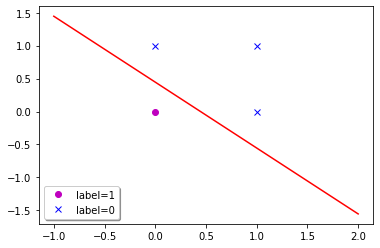

In [14]:
fig, ax = plt.subplots() 

o_points = x_train.T[y_train.T[:, 0] == 1]
x_points = x_train.T[y_train.T[:, 0] == 0]
ax.plot(o_points[:, 0], o_points[:, 1], 'mo')
ax.plot(x_points[:, 0], x_points[:, 1], 'bx')
plt.legend(('label=1', 'label=0'), loc='lower left', shadow=True)

x =  np.arange(-1, 3)
ax.plot(x, ((w[0][0] * x + b) / (-w[1][0])), color='red')